### Importaci√≥n de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [ ]:
import csv
import urllib.request

def cargar_datos_desde_url(url):
    response = urllib.request.urlopen(url)
    lines = [l.decode('utf-8') for l in response.readlines()]
    return list(csv.reader(lines))

# Cargamos los datos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = cargar_datos_desde_url(url1)
tienda2 = cargar_datos_desde_url(url2)
tienda3 = cargar_datos_desde_url(url3)
tienda4 = cargar_datos_desde_url(url4)

#1. An√°lisis de facturaci√≥n



In [ ]:
def calcular_facturacion(datos_tienda):
    facturacion = 0.0
    for fila in datos_tienda[1:]:  # Ignoramos la cabecera (primera fila)
        precio = float(fila[2])    # El precio est√° en la posici√≥n 2 (tercer dato)
        facturacion += precio
    return facturacion

# Calculamos facturaci√≥n para cada tienda
facturacion_tienda1 = calcular_facturacion(tienda1)
facturacion_tienda2 = calcular_facturacion(tienda2)
facturacion_tienda3 = calcular_facturacion(tienda3)
facturacion_tienda4 = calcular_facturacion(tienda4)

# Mostramos resultados
print(f"Facturaci√≥n Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Facturaci√≥n Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Facturaci√≥n Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Facturaci√≥n Tienda 4: ${facturacion_tienda4:,.2f}")

Facturaci√≥n Tienda 1: $1,150,880,400.00
Facturaci√≥n Tienda 2: $1,116,343,500.00
Facturaci√≥n Tienda 3: $1,098,019,600.00
Facturaci√≥n Tienda 4: $1,038,375,700.00


# 2. Ventas por categor√≠a

In [ ]:
def ventas_por_categoria(datos_tienda):
    # Diccionario para almacenar resultados: {categor√≠a: [conteo, ganancia_total]}
    resumen = {}

    for fila in datos_tienda[1:]:  # Ignoramos la cabecera
        categoria = fila[1]        # 'Categor√≠a del Producto' est√° en posici√≥n 1
        precio = float(fila[2])    # 'Precio' est√° en posici√≥n 2

        if categoria in resumen:
            resumen[categoria][0] += 1      # Sumamos 1 al conteo
            resumen[categoria][1] += precio  # Sumamos el precio a la ganancia
        else:
            resumen[categoria] = [1, precio] # Inicializamos la categor√≠a

    return resumen

# Calculamos para cada tienda
ventas_tienda1 = ventas_por_categoria(tienda1)
ventas_tienda2 = ventas_por_categoria(tienda2)
ventas_tienda3 = ventas_por_categoria(tienda3)
ventas_tienda4 = ventas_por_categoria(tienda4)

# Mostramos resultados para cada Tienda
print("\nVentas por categor√≠a en Tienda 1:")
for categoria, (conteo, ganancia) in ventas_tienda1.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categor√≠a en Tienda 2:")
for categoria, (conteo, ganancia) in ventas_tienda2.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categor√≠a en Tienda 3:")
for categoria, (conteo, ganancia) in ventas_tienda3.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")

print("\nVentas por categor√≠a en Tienda 4:")
for categoria, (conteo, ganancia) in ventas_tienda4.items():
    print(f"- {categoria}: {conteo} productos, Ganancia = ${ganancia:,.2f}")



Ventas por categor√≠a en Tienda 1:
- Electr√≥nicos: 448 productos, Ganancia = $429,493,500.00
- Muebles: 465 productos, Ganancia = $187,633,700.00
- Juguetes: 324 productos, Ganancia = $17,995,700.00
- Electrodom√©sticos: 312 productos, Ganancia = $363,685,200.00
- Art√≠culos para el hogar: 171 productos, Ganancia = $12,698,400.00
- Deportes y diversi√≥n: 284 productos, Ganancia = $39,290,000.00
- Libros: 173 productos, Ganancia = $8,784,900.00
- Instrumentos musicales: 182 productos, Ganancia = $91,299,000.00

Ventas por categor√≠a en Tienda 2:
- Muebles: 442 productos, Ganancia = $176,426,300.00
- Instrumentos musicales: 224 productos, Ganancia = $104,990,300.00
- Deportes y diversi√≥n: 275 productos, Ganancia = $34,744,500.00
- Electr√≥nicos: 422 productos, Ganancia = $410,831,100.00
- Art√≠culos para el hogar: 181 productos, Ganancia = $14,746,900.00
- Juguetes: 313 productos, Ganancia = $15,945,400.00
- Electrodom√©sticos: 305 productos, Ganancia = $348,567,800.00
- Libros: 197 p

# 3. Calificaci√≥n promedio de la tienda


In [ ]:
def calcular_promedio_calificaciones(datos_tienda):
    suma_calificaciones = 0
    total_registros = 0

    indice_calificacion = datos_tienda[0].index('Calificaci√≥n')  # Posici√≥n de la columna

    for fila in datos_tienda[1:]:  # Ignoramos la cabecera
        calificacion = float(fila[indice_calificacion])  # Convertimos a n√∫mero
        suma_calificaciones += calificacion
        total_registros += 1

    return suma_calificaciones / total_registros if total_registros > 0 else 0

# Calculamos el promedio para cada tienda
promedio_tienda1 = calcular_promedio_calificaciones(tienda1)
promedio_tienda2 = calcular_promedio_calificaciones(tienda2)
promedio_tienda3 = calcular_promedio_calificaciones(tienda3)
promedio_tienda4 = calcular_promedio_calificaciones(tienda4)

# Mostramos resultados
print(f"Promedio de calificaciones Tienda 1: {promedio_tienda1:.2f}")
print(f"Promedio de calificaciones Tienda 2: {promedio_tienda2:.2f}")
print(f"Promedio de calificaciones Tienda 3: {promedio_tienda3:.2f}")
print(f"Promedio de calificaciones Tienda 4: {promedio_tienda4:.2f}")

Promedio de calificaciones Tienda 1: 3.98
Promedio de calificaciones Tienda 2: 4.04
Promedio de calificaciones Tienda 3: 4.05
Promedio de calificaciones Tienda 4: 4.00


# 4. Productos m√°s y menos vendidos

In [ ]:
from collections import Counter

def productos_mas_y_menos_vendidos(datos_tienda, nombre_tienda):
    indice_producto = datos_tienda[0].index('Producto')  # Posici√≥n de la columna 'Producto'
    productos = [fila[indice_producto] for fila in datos_tienda[1:]]  # Lista de todos los productos vendidos

    conteo_productos = Counter(productos)  # Cuenta las ocurrencias de cada producto

    # Producto m√°s vendido (mayor conteo)
    producto_mas_vendido, cantidad_mas = conteo_productos.most_common(1)[0]

    # Producto menos vendido (menor conteo)
    producto_menos_vendido, cantidad_menos = conteo_productos.most_common()[-1]

    print(f"\n**Tienda: {nombre_tienda}**")
    print(f"Producto m√°s vendido: '{producto_mas_vendido}' ({cantidad_mas} ventas)")
    print(f"Producto menos vendido: '{producto_menos_vendido}' ({cantidad_menos} ventas)")

# Aplicamos a cada tienda
productos_mas_y_menos_vendidos(tienda1, "Tienda 1")
productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
productos_mas_y_menos_vendidos(tienda4, "Tienda 4")


**Tienda: Tienda 1**
Producto m√°s vendido: 'Microondas' (60 ventas)
Producto menos vendido: 'Celular ABXY' (33 ventas)

**Tienda: Tienda 2**
Producto m√°s vendido: 'Iniciando en programaci√≥n' (65 ventas)
Producto menos vendido: 'Juego de mesa' (32 ventas)

**Tienda: Tienda 3**
Producto m√°s vendido: 'Kit de bancas' (57 ventas)
Producto menos vendido: 'Bloques de construcci√≥n' (35 ventas)

**Tienda: Tienda 4**
Producto m√°s vendido: 'Cama box' (62 ventas)
Producto menos vendido: 'Guitarra el√©ctrica' (33 ventas)


# 5. Env√≠o promedio por tienda

In [ ]:
def calcular_promedio_envio(datos_tienda, nombre_tienda):
    indice_envio = datos_tienda[0].index('Costo de env√≠o')  # Posici√≥n de la columna
    costos_envio = []

    for fila in datos_tienda[1:]:  # Ignorar cabecera
        try:
            costo = float(fila[indice_envio])  # Convertir a n√∫mero
            costos_envio.append(costo)
        except ValueError:  # Por si hay datos vac√≠os o no num√©ricos
            continue

    promedio = sum(costos_envio) / len(costos_envio) if costos_envio else 0
    print(f"Tienda {nombre_tienda}: Costo promedio de env√≠o = ${promedio:,.2f}")

# Calcular para cada tienda
calcular_promedio_envio(tienda1, "1")
calcular_promedio_envio(tienda2, "2")
calcular_promedio_envio(tienda3, "3")
calcular_promedio_envio(tienda4, "4")

Tienda 1: Costo promedio de env√≠o = $26,018.61
Tienda 2: Costo promedio de env√≠o = $25,216.24
Tienda 3: Costo promedio de env√≠o = $24,805.68
Tienda 4: Costo promedio de env√≠o = $23,459.46


# RESUMEN

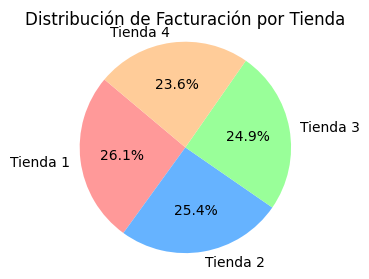

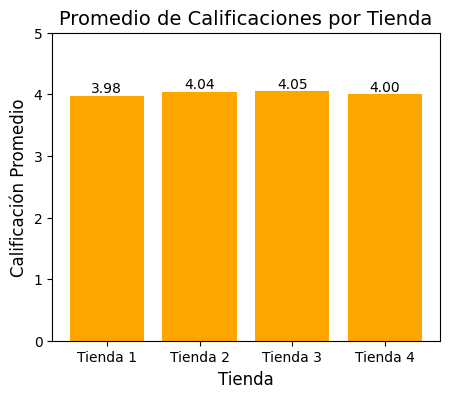

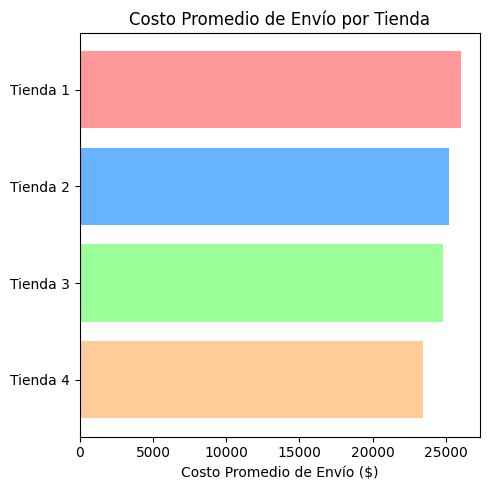

In [14]:
import matplotlib.pyplot as plt

facturacion = [1150880400, 1116343500, 1098019600, 1038375700]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(3,3))  # Tama√±o reducido
plt.pie(facturacion, labels=tiendas, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title('Distribuci√≥n de Facturaci√≥n por Tienda')
plt.axis('equal')


tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [3.98, 4.04, 4.05, 4.00]

plt.figure(figsize=(5, 4))
bars = plt.bar(tiendas, promedios, color='#FFA500')

plt.title("Promedio de Calificaciones por Tienda", fontsize=14)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Calificaci√≥n Promedio", fontsize=12)
plt.ylim(0, 5)  # Rango t√≠pico de calificaciones (0-5)

# A√±adir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.2f}",
             ha='center', va='bottom')



tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos_envio = [26018.61, 25216.24, 24805.68, 23459.46]
colores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Crear gr√°fico de barras horizontales
plt.figure(figsize=(5,5))  # Tama√±o reducido, igual que el gr√°fico anterior
plt.barh(tiendas, costos_envio, color=colores)
plt.xlabel('Costo Promedio de Env√≠o ($)')
plt.title('Costo Promedio de Env√≠o por Tienda')

# Invertir eje Y para que Tienda 1 quede arriba
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()



# CONCLUSIONES

# üìä Informe Comercial: An√°lisis de Desempe√±o de Tiendas

**Cliente:** Joao
**Fecha:** 14 de junio de 2025  
**Analista:** M. Gast√≥n Kopelzon

---

## 1. Introducci√≥n

Con el objetivo de optimizar operaciones y maximizar la rentabilidad, se ha realizado un an√°lisis detallado del desempe√±o de las cuatro tiendas activas. Este informe tiene como prop√≥sito determinar cu√°l de las cuatro tiendas ser√≠a la candidata m√°s adecuada para su eventual cierre.

---

## 2. An√°lisis Comparativo

### 2.1 Facturaci√≥n Anual

| Tienda   | Facturaci√≥n ($)        |
|----------|------------------------|
| Tienda 1 | 1,150,880,400.00       |
| Tienda 2 | 1,116,343,500.00       |
| Tienda 3 | 1,098,019,600.00       |
| **Tienda 4** | **1,038,375,700.00**   |

‚û°Ô∏è **Tienda 4 presenta la facturaci√≥n m√°s baja**, con una diferencia de m√°s de $112 millones respecto a Tienda 1.

---

### 2.2 Rentabilidad por Categor√≠a

Aunque todas las tiendas generan ingresos en categor√≠as similares, se observa lo siguiente en **Tienda 4**:

- La ganancia en **Electrodom√©sticos** ($283M) y **Electr√≥nicos** ($409M) est√° por debajo de otras tiendas.
- Las ganancias en categor√≠as menos rentables como **Juguetes**, **Libros** y **Art√≠culos para el hogar** son comparativamente bajas.
- Su margen total es m√°s reducido en casi todas las categor√≠as respecto a las otras tiendas.

---

### 2.3 Calificaciones Promedio de Clientes

| Tienda   | Calificaci√≥n Promedio |
|----------|------------------------|
| Tienda 1 | 3.98                   |
| Tienda 2 | 4.04                   |
| Tienda 3 | 4.05                   |
| **Tienda 4** | **4.00**               |

Aunque Tienda 4 no tiene una calificaci√≥n baja, es la **segunda m√°s baja** entre las cuatro, y no muestra una ventaja destacable en la satisfacci√≥n del cliente.

---

### 2.4 Costo Promedio de Env√≠o

| Tienda   | Costo Promedio de Env√≠o ($) |
|----------|------------------------------|
| Tienda 1 | 26,018.61                    |
| Tienda 2 | 25,216.24                    |
| Tienda 3 | 24,805.68                    |
| **Tienda 4** | **23,459.46**                |

üîπ Aunque **Tienda 4 tiene el menor costo de env√≠o**, esta ventaja no compensa la menor facturaci√≥n ni los m√°rgenes de ganancia m√°s bajos.

---

### 2.5 Productos Vendidos

- **Producto m√°s vendido en Tienda 4:** `Cama box` (62 ventas)  
- **Producto menos vendido en Tienda 4:** `Guitarra el√©ctrica` (33 ventas)

Estos niveles de ventas no representan una ventaja significativa frente a las dem√°s tiendas.

---

## 3. Conclusi√≥n

Tras analizar los indicadores clave de desempe√±o ‚Äîfacturaci√≥n, rentabilidad por categor√≠a, calificaci√≥n de clientes, productos vendidos y costos log√≠sticos‚Äî se concluye que:

### ‚ùó **Tienda 4 es la candidata m√°s propensa a ser cerrada.**

Esto se debe principalmente a:

- La **facturaci√≥n m√°s baja** del grupo.
- **Menores m√°rgenes de ganancia** en categor√≠as clave.
- Una calificaci√≥n de cliente inferior respecto a la media.
- Un desempe√±o general sin ventajas competitivas significativas que justifiquen su continuidad.

---

## 4. Recomendaciones

- Iniciar una evaluaci√≥n operativa y de personal en Tienda 4 para preparar un plan de cierre controlado.
- Analizar la posibilidad de **redistribuir inventario y personal** a las tiendas con mejor desempe√±o (especialmente Tienda 1).
- Comunicar el proceso a los clientes y empleados de manera transparente, con foco en mantener la experiencia de marca.






---

